## Section 1: Setup and Libraries

In [1]:
# Install Sentence Transformers if not already installed
#!pip install -q sentence-transformers
#!pip install -q spacy
#!python -m spacy download en_core_web_sm
#pip install matplotlib matplotlib-venn

from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd


## Section 2: Sample Resume & Job Description

In [11]:
# Sample Resume (Paste your own when ready)
resume_text = """
John Smith
Email: johnsmith@email.com
Phone: +1-234-567-8901

Summary:
Detail-oriented Data Analyst with 3+ years of experience in analyzing business data, building dashboards, and driving insights to support strategic decision-making.

Skills:
- Python (Pandas, NumPy, Scikit-learn)
- SQL (PostgreSQL, MySQL)
- Tableau & Power BI
- A/B Testing, Regression, Time Series Forecasting
- Excel (Advanced Functions, Pivot Tables)

Experience:
Data Analyst – XYZ Corp
Jan 2021 – Present
• Built and automated Tableau dashboards reducing reporting time by 40%
• Conducted A/B testing for marketing campaigns leading to 15% lift in CTR
• Cleaned and modeled data for predictive analytics using Scikit-learn

Education:
B.S. in Statistics – University of California, Berkeley
"""

# Sample Job Description (Business Analyst at Amazon, rephrased)
job_description = """
We are seeking a Business/Data Analyst to join our e-commerce analytics team. 
This person will support business teams by developing metrics, dashboards, and predictive models to guide decision-making.

Key Responsibilities:
- Create dashboards using Power BI and Tableau
- Analyze trends using SQL and Python
- Develop predictive models for customer behavior
- Collaborate cross-functionally with product and marketing teams

Basic Qualifications:
- Bachelor's in a quantitative field (Statistics, CS, Business Analytics)
- Proficiency in SQL and Python
- Strong communication and data storytelling skills
"""


## Section 3: Embedding with Sentence-BERT

In [14]:
# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
resume_embedding = model.encode(resume_text, convert_to_tensor=True)
job_embedding = model.encode(job_description, convert_to_tensor=True)

# Compute cosine similarity
similarity_score = util.cos_sim(resume_embedding, job_embedding)

print(f"🔍 Cosine Similarity Score: {similarity_score.item():.3f} (1.0 = perfect match)")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\nikhi\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nikhi\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

🔍 Cosine Similarity Score: 0.740 (1.0 = perfect match)


# Skill & Keyword Overlap Explainer (Phase 2)
----
## Section 1: Extract Keywords from Resume & JD

In [21]:
import spacy
from collections import Counter

# Load English model
nlp = spacy.load("en_core_web_sm")

# Function to extract keywords (nouns and proper nouns only)
def extract_keywords(text):
    doc = nlp(text.lower())
    return [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN'] and not token.is_stop and token.is_alpha]

# Apply to both texts
resume_keywords = extract_keywords(resume_text)
jd_keywords = extract_keywords(job_description)

# Count occurrences
resume_freq = Counter(resume_keywords)
jd_freq = Counter(jd_keywords)


## Section 2: Compare Keywords for Overlap

**Now let’s see:**

1. What skills match

2. What skills are missing from resume

3. What unique skills are only in the resume

In [30]:
# Overlap sets
resume_set = set(resume_keywords)
jd_set = set(jd_keywords)

# Match analysis
matched = resume_set & jd_set
missing = jd_set - resume_set
extra = resume_set - jd_set

print("✅ Matched Skills:", sorted(matched))
print("\n⚠️ Missing from Resume:", sorted(missing))
print("\n💡 Present in Resume but Not in JD:", sorted(extra))


✅ Matched Skills: ['analyst', 'analytics', 'bi', 'business', 'dashboards', 'data', 'decision', 'making', 'marketing', 'power', 'skills', 'statistics', 'tableau']

⚠️ Missing from Resume: ['analyze', 'bachelor', 'behavior', 'communication', 'cross', 'customer', 'e', 'field', 'metrics', 'models', 'person', 'product', 'proficiency', 'qualifications', 'responsibilities', 'storytelling', 'team', 'teams', 'trends']

💡 Present in Resume but Not in JD: ['b', 'berkeley', 'california', 'campaigns', 'corp', 'ctr', 'detail', 'education', 'email', 'excel', 'experience', 'forecasting', 'functions', 'insights', 'jan', 'john', 'lift', 'mysql', 'numpy', 'pandas', 'phone', 'postgresql', 'python', 'regression', 'reporting', 'scikit', 'series', 'smith', 'summary', 'tables', 'testing', 'time', 'university', 'xyz', 'years']


**This is incredibly useful because:**

- You know what keywords are boosting your similarity.
- You can identify gaps to address before applying.
- You can tailor your resume directly to the job.

## Section 3: Wrap in Function

In [35]:
def keyword_overlap_analysis(resume_text, job_description):
    resume_kw = set(extract_keywords(resume_text))
    jd_kw = set(extract_keywords(job_description))

    matched = resume_kw & jd_kw
    missing = jd_kw - resume_kw
    extra = resume_kw - jd_kw

    print("✅ Matched Skills:", sorted(matched))
    print("\n⚠️ Missing from Resume:", sorted(missing))
    print("\n💡 Present in Resume but Not in JD:", sorted(extra))


# Skill Visualization (Venn Diagram & Bar Charts) (Phase 3)

## Step 1: Add Venn Diagram & Bar Charts

We'll use matplotlib and matplotlib_venn to show:

- Overlap between resume and job description
- Count of keywords: matched, missing, extra

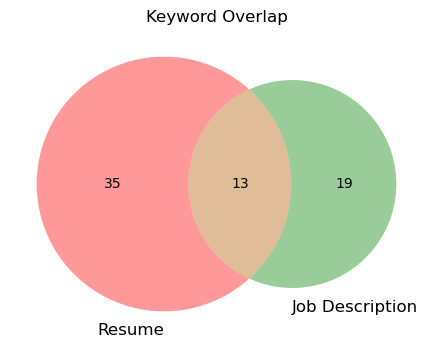

In [42]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def visualize_keyword_overlap(resume_keywords, jd_keywords):
    resume_set = set(resume_keywords)
    jd_set = set(jd_keywords)

    plt.figure(figsize=(6, 4))
    venn2([resume_set, jd_set], set_labels=("Resume", "Job Description"))
    plt.title("Keyword Overlap")
    plt.show()

visualize_keyword_overlap(resume_keywords, jd_keywords)

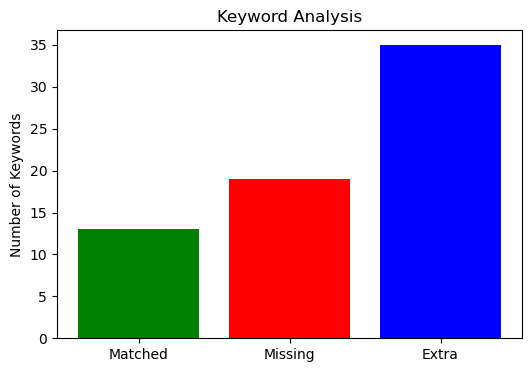

In [48]:
def plot_keyword_counts(resume_keywords, jd_keywords):
    resume_set = set(resume_keywords)
    jd_set = set(jd_keywords)

    matched = resume_set & jd_set
    missing = jd_set - resume_set
    extra = resume_set - jd_set

    labels = ['Matched', 'Missing', 'Extra']
    counts = [len(matched), len(missing), len(extra)]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, counts, color=['green', 'red', 'blue'])
    plt.title("Keyword Analysis")
    plt.ylabel("Number of Keywords")
    plt.show()

plot_keyword_counts(resume_keywords, jd_keywords)

## Step 2: Score Breakdown

Let’s calculate:

- **Match %**: What % of JD keywords are in resume?
- **Gap %**: What % are missing?
- **Extra %**: Unique terms in resume

In [62]:
def keyword_score_breakdown(resume_keywords, jd_keywords):
    resume_set = set(resume_keywords)
    jd_set = set(jd_keywords)

    matched = resume_set & jd_set
    missing = jd_set - resume_set
    extra = resume_set - jd_set

    match_percent = round(len(matched) / len(jd_set) * 100, 2)
    gap_percent = round(len(missing) / len(jd_set) * 100, 2)
    extra_percent = round(len(extra) / len(resume_set) * 100, 2)

    print(f"✅ Match Coverage: {match_percent}% of JD terms found in resume")
    print(f"⚠️ Gaps: {gap_percent}% of JD terms are missing")
    print(f"💡 Resume Unique Value: {extra_percent}% of resume terms are extra")

    return {
        "match": match_percent,
        "gap": gap_percent,
        "extra": extra_percent
    }
keyword_score_breakdown(resume_keywords, jd_keywords)


✅ Match Coverage: 40.62% of JD terms found in resume
⚠️ Gaps: 59.38% of JD terms are missing
💡 Resume Unique Value: 72.92% of resume terms are extra


{'match': 40.62, 'gap': 59.38, 'extra': 72.92}

## Step 3: Integrate All in One Analysis Function

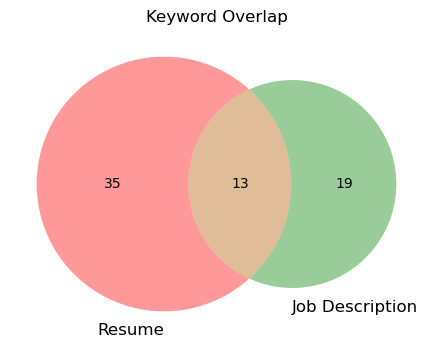

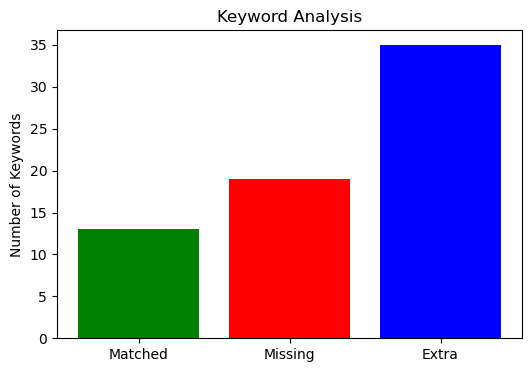

✅ Match Coverage: 40.62% of JD terms found in resume
⚠️ Gaps: 59.38% of JD terms are missing
💡 Resume Unique Value: 72.92% of resume terms are extra


{'match': 40.62, 'gap': 59.38, 'extra': 72.92}

In [64]:
def full_keyword_overlap_analysis(resume_text, job_description):
    resume_keywords = extract_keywords(resume_text)
    jd_keywords = extract_keywords(job_description)

    # Text-based report
    keyword_overlap_analysis(resume_text, job_description)

    # Score
    print("\n🔢 Score Breakdown:")
    keyword_score_breakdown(resume_keywords, jd_keywords)

# Visuals
visualize_keyword_overlap(resume_keywords, jd_keywords)
plot_keyword_counts(resume_keywords, jd_keywords)
keyword_score_breakdown(resume_keywords, jd_keywords)
